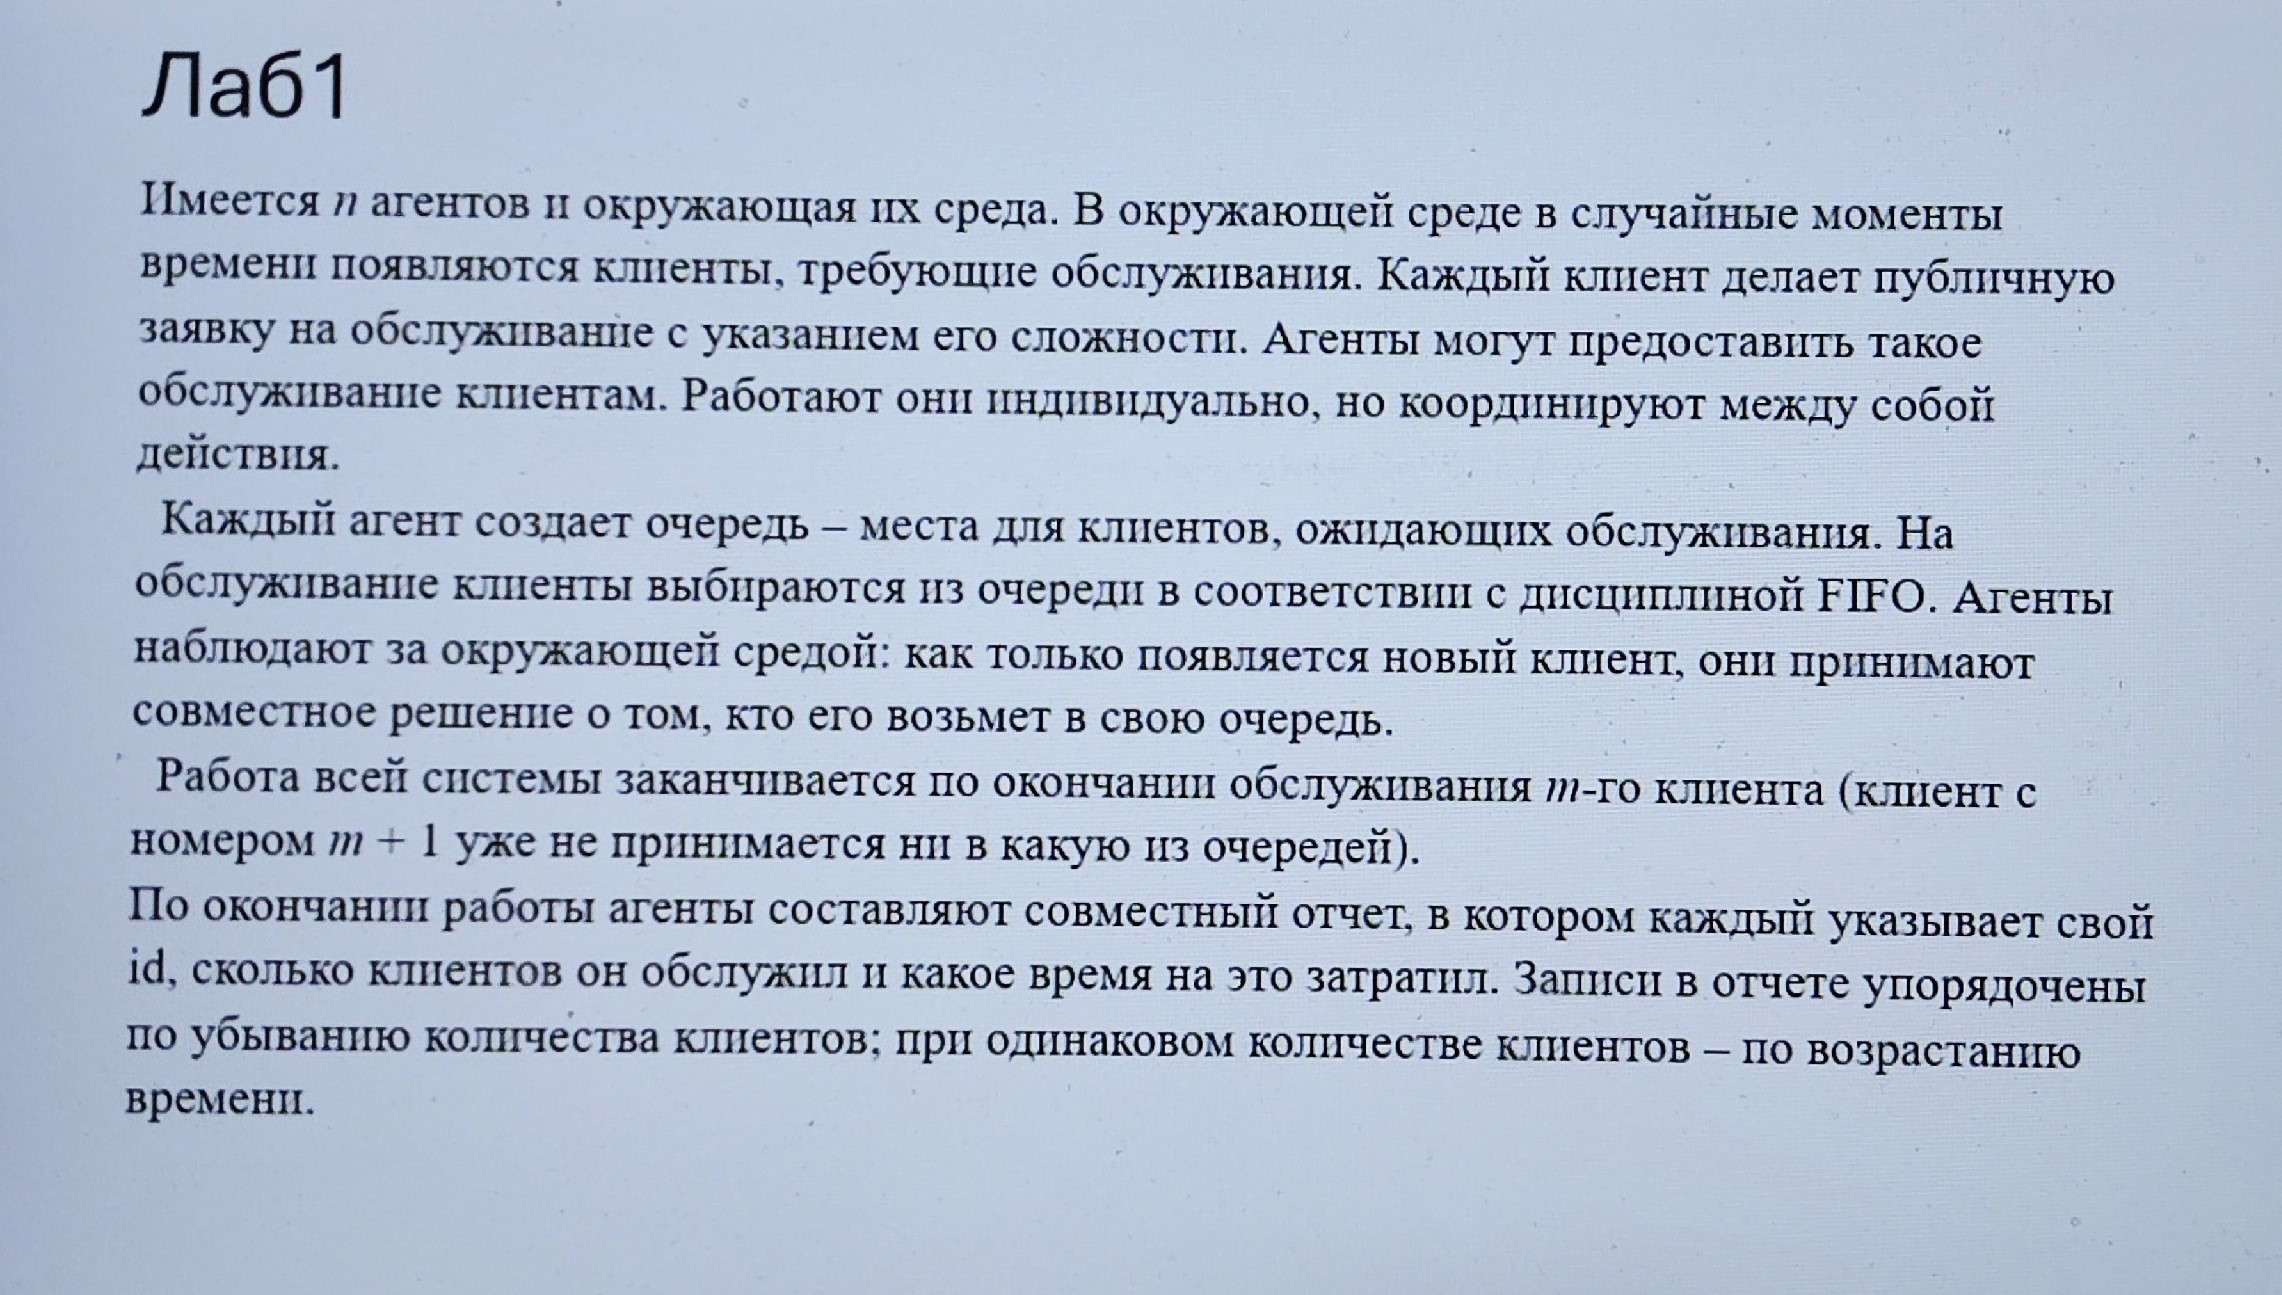

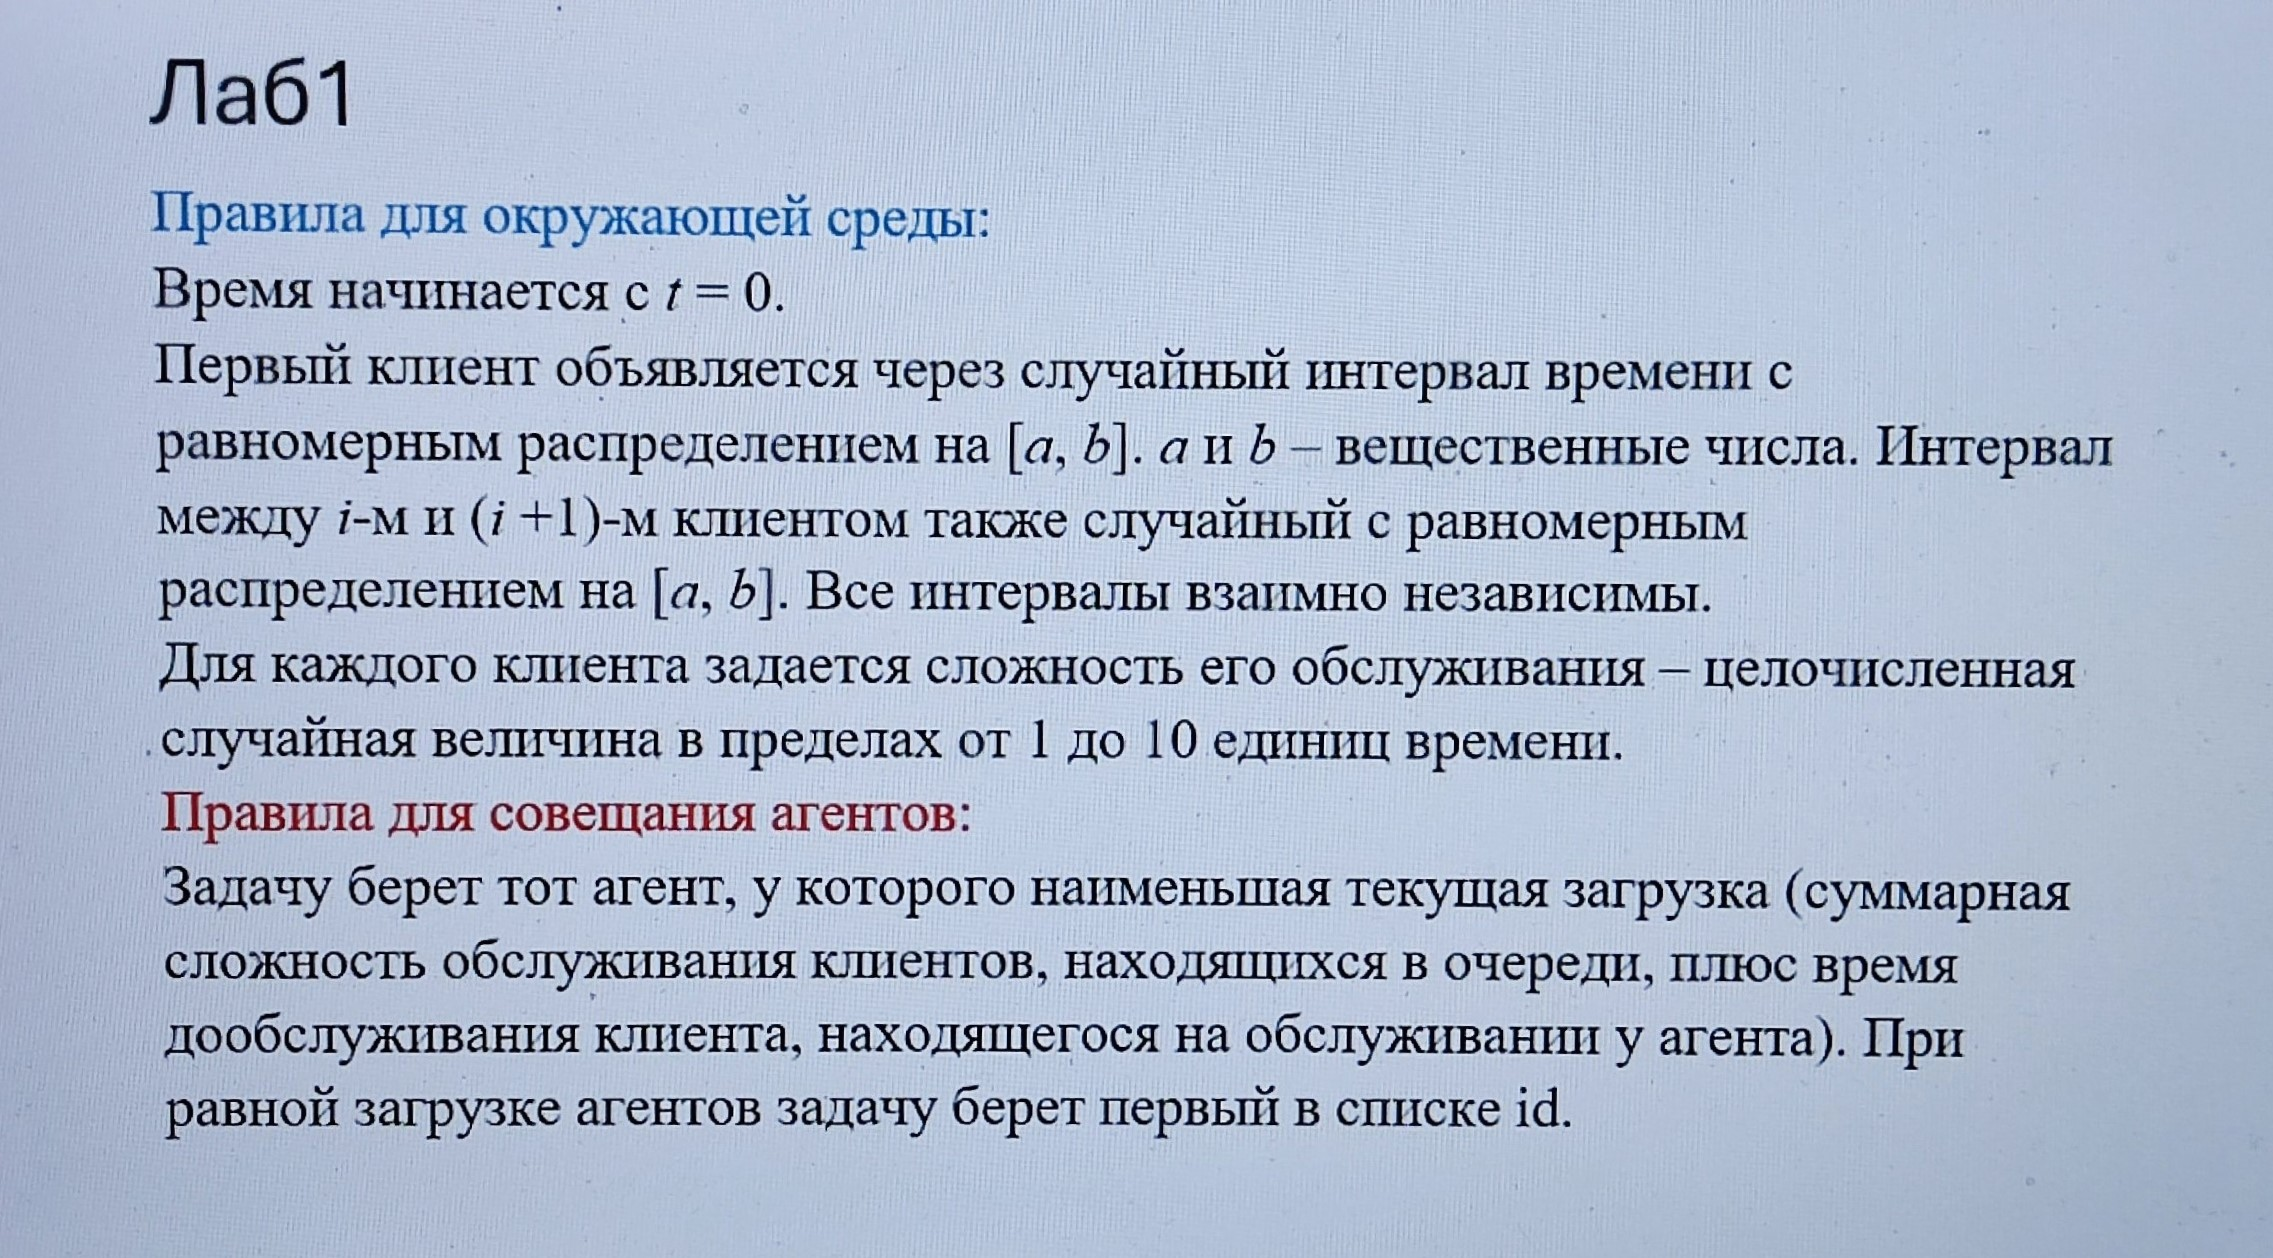

In [50]:

from random import randint, random
import numpy as np

t = 0

a, b = 1, 10
complexity = (1, 100)

n, m = 10, 40

class Agent:
  def __init__(self, id):
    self.id = id
    self.queue = []
    self.tek_time = 0
    self.count = 0
    self.time = 0
    
  def add_client(self, k):
    self.tek_time += k
    self.queue.append(k)
    self.count += 1
    self.time += k
  
  def __str__(self):
    return self.time
  def __lt__(self, other):
    return self.tek_time < other.tek_time

  def __eq__(self, other):
    return self.tek_time == other.tek_time

  def __gt__(self, other):
    return self.tek_time > other.tek_time

agents = np.array([Agent(i) for i in range(n)])
for i in range(m):
  dt = a + random()*b
  
  for ag in agents:
    ag.tek_time = max(ag.tek_time-dt, 0)
    dt1 = dt
    while ag.queue and dt1 >= ag.queue[0]:
      dt1 -= ag.queue[0]
      ag.queue.pop(0)
    if ag.queue:
      ag.queue[0] -= dt1
  
  agents[agents.argmin()].add_client(randint(*complexity))

res = sorted(agents, key=lambda x:[m-x.count, x.time])
for i in range(n):
  print(f"Агент {res[i].id} клиентов {res[i].count}, время {res[i].time}")

Агент 3 клиентов 6, время 188
Агент 0 клиентов 6, время 288
Агент 2 клиентов 5, время 233
Агент 8 клиентов 4, время 109
Агент 5 клиентов 4, время 196
Агент 4 клиентов 4, время 204
Агент 1 клиентов 4, время 267
Агент 7 клиентов 3, время 212
Агент 9 клиентов 2, время 111
Агент 6 клиентов 2, время 155
